## Exploratory Data Analysis

In [268]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import islice

In [269]:
edges = pd.read_csv("./data/edges.csv")
nodes = pd.read_csv("./data/nodes.csv")

In [270]:
edges

,primary_artist_id,featured_artist_id,collaboration_count
0,7y97mc3bZRFXzT2szRM4L4,0HC5DGqdUzXorIXUudkeWG,3
1,7y97mc3bZRFXzT2szRM4L4,7Im00DCJCJrFrC1Ho6vjD6,6
2,6iqDK7aHVlwGGgPmcdSK5L,3ppWDN3lGw7UOGY7z2EQLB,1
3,6iqDK7aHVlwGGgPmcdSK5L,5hqRsNHDZH1jHzI9LgxFRZ,1
4,6iqDK7aHVlwGGgPmcdSK5L,67VM1TW9hWE9hlVYcmioaH,1
...,...,...,...
4036,3eXp28Gf4fOTq0HH1wK2ul,79F8bMSKKnd31KR5rQMABc,1
4037,3eXp28Gf4fOTq0HH1wK2ul,7FwxJtVorL07N6kbqmkPr6,1
4038,6YpCzWpIXRTdLlpPgDcMJZ,3OFZwEYEAKMEmUheZ8TKso,1
4039,1nEmAvnOKMBYCziZQNb5B4,4kKbItPBdKcK8wQ8A9LXMt,1


In [271]:
nodes

,id,name,genres,popularity,followers
0,7y97mc3bZRFXzT2szRM4L4,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl...",73,3217463
1,6iqDK7aHVlwGGgPmcdSK5L,Tribbs,"['polish pop', 'polish viral pop']",69,147928
2,1T4HxOYolAEb5PadIVKdWZ,Gibbs,['polish hip hop'],70,375421
3,7CJgLPEqiIRuneZSolpawQ,Taco Hemingway,"['polish hip hop', 'polish trap']",69,1453560
4,0LX2VNf5w4iOHW1yyIqb74,Bedoes 2115,"['polish hip hop', 'polish trap']",69,1500183
...,...,...,...,...,...
493,6YpCzWpIXRTdLlpPgDcMJZ,Łona,"['polish alternative rap', 'polish old school ...",40,11356
494,1H8lEfbUpbcXWFqbW9BMro,WŁODAR,['polish viral pop'],40,27681
495,1CzKORB9IN0EjPEyeKBIkf,Tides From Nebula,"['cosmic post-rock', 'instrumental post-rock',...",30,50548
496,6gG1FOW5CoylM7858JYboD,Piotr Rogucki,"['polish alternative', 'sung poetry']",40,74127


In [272]:
mapped_edges = edges.apply(
    lambda row: (
        row["primary_artist_id"],
        row["featured_artist_id"],
        {
            "collaboration_count": row["collaboration_count"],
        },
    ),
    axis=1,
)

In [273]:
mapped_nodes = nodes.apply(
    lambda row: (
        row["id"],
        {
            "name": row["name"],
            "genres": row["genres"],
            "popularity": row["popularity"],
            "followers": row["followers"],
        },
    ),
    axis=1,
)

In [274]:
G = nx.DiGraph()

G.add_nodes_from(mapped_nodes, label="author")
G.add_weighted_edges_from(mapped_edges, weight="collaboration_count")

print(G.edges(data=True))

[('7y97mc3bZRFXzT2szRM4L4', '0HC5DGqdUzXorIXUudkeWG', {'collaboration_count': {'collaboration_count': 3}}), ('7y97mc3bZRFXzT2szRM4L4', '7Im00DCJCJrFrC1Ho6vjD6', {'collaboration_count': {'collaboration_count': 6}}), ('6iqDK7aHVlwGGgPmcdSK5L', '3ppWDN3lGw7UOGY7z2EQLB', {'collaboration_count': {'collaboration_count': 1}}), ('6iqDK7aHVlwGGgPmcdSK5L', '5hqRsNHDZH1jHzI9LgxFRZ', {'collaboration_count': {'collaboration_count': 1}}), ('6iqDK7aHVlwGGgPmcdSK5L', '67VM1TW9hWE9hlVYcmioaH', {'collaboration_count': {'collaboration_count': 1}}), ('6iqDK7aHVlwGGgPmcdSK5L', '6Lf4vAUaFUR2jAsybC7cGV', {'collaboration_count': {'collaboration_count': 1}}), ('6iqDK7aHVlwGGgPmcdSK5L', '76Uu7lnLuTOmH2eZsKZTan', {'collaboration_count': {'collaboration_count': 2}}), ('1T4HxOYolAEb5PadIVKdWZ', '0BBB9DjvskQV0oReJMxTP1', {'collaboration_count': {'collaboration_count': 1}}), ('1T4HxOYolAEb5PadIVKdWZ', '0Wi2fADbhwXlPUWxBmzo99', {'collaboration_count': {'collaboration_count': 3}}), ('1T4HxOYolAEb5PadIVKdWZ', '0bNZDC5i

In [275]:
# Remove nodes with empty metadata
for node in list(G.nodes(data=True)):
    if not node[1]:
        G.remove_node(node[0])

In [276]:
def get_df_with_artist(df):
    df = df.reset_index().rename(columns={"index": "id"})
    df = pd.merge(df, nodes[["id", "name"]], on="id", how="left")

    return df.drop("id", axis=1)

Badamy stopień każdego wierzchołka

In [277]:
degrees = G.degree()

df_degree = pd.DataFrame.from_dict(dict(degrees), orient="index", columns=["Degree"])
df_degree = get_df_with_artist(df_degree)

df_degree.sort_values(by="Degree", ascending=False).head(20)

,Degree,name
23,94,Białas
47,84,Paluch
49,74,Pezet
38,72,Kaz Bałagane
12,69,Kizo
79,69,Magiera
24,68,Deemz
94,66,Sarius
6,66,Szpaku
175,65,Peja


Text(0.5, 1.0, 'Degree distribution (log scale)')

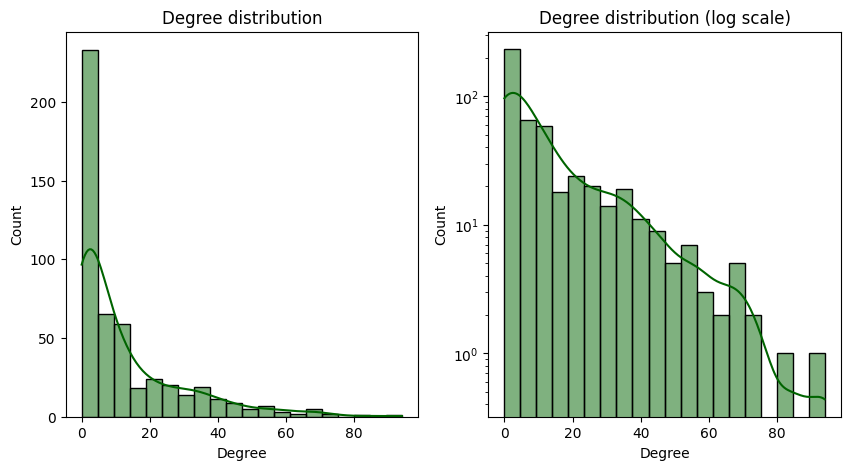

In [278]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(
    ax=axes[0], data=df_degree, x="Degree", bins=20, kde=True, color="darkgreen"
)
axes[0].set_title("Degree distribution")

sns.histplot(
    ax=axes[1], data=df_degree, x="Degree", bins=20, kde=True, color="darkgreen"
)
plt.yscale("log")
axes[1].set_title("Degree distribution (log scale)")

In [279]:
degrees_in = dict(G.in_degree())
degrees_out = dict(G.out_degree())

df_degree_in = pd.DataFrame.from_dict(
    dict(degrees_in), orient="index", columns=["Degree"]
)
df_degree_out = pd.DataFrame.from_dict(
    dict(degrees_out), orient="index", columns=["Degree"]
)

df_degree_in = get_df_with_artist(df_degree_in)
df_degree_out = get_df_with_artist(df_degree_out)

Wyświetlenie artystów z największym degree_in - artyści z największą liczba kolaboracji, gdzie oni są goścmi

In [280]:
df_degree_in.sort_values(by="Degree", ascending=False).head(10)

,Degree,name
47,56,Paluch
23,47,Białas
6,46,Szpaku
38,43,Kaz Bałagane
49,41,Pezet
94,39,Sarius
175,36,Peja
29,35,Young Igi
157,34,Gedz
358,32,Ero


Wyświetlenie artystów z największym degree_out - artyści z największą liczba kolaboracji, gdzie są głównymi wykonawcami

In [281]:
df_degree_out.sort_values(by="Degree", ascending=False).head(10)

,Degree,name
32,52,SB Maffija
79,52,Magiera
275,50,Dj Decks
24,47,Deemz
23,47,Białas
12,38,Kizo
16,38,Kubi Producent
37,35,Żabson
242,33,Pawbeats
42,33,Tymek


Wyświetlenie degrees_in i degrees_out

Text(0.5, 1.0, 'Degree out distribution (log scale)')

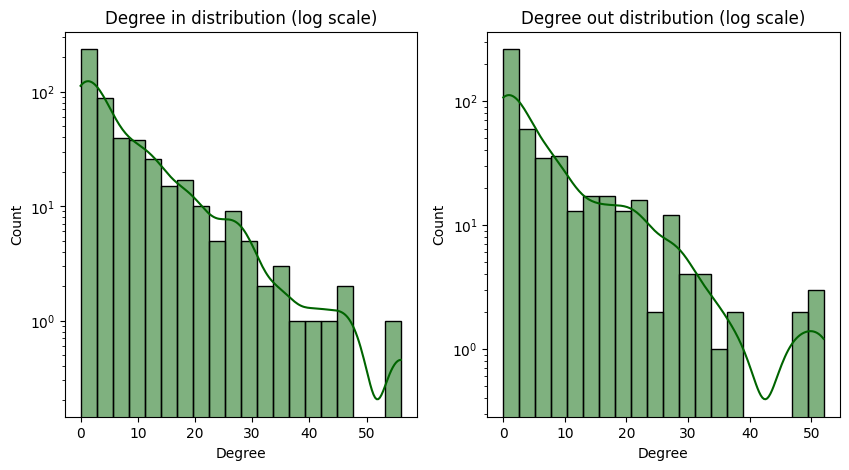

In [282]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(
    ax=axes[0], data=df_degree_in, x="Degree", bins=20, kde=True, color="darkgreen"
)
axes[0].set_yscale("log")
axes[0].set_title("Degree in distribution (log scale)")

sns.histplot(
    ax=axes[1], data=df_degree_out, x="Degree", bins=20, kde=True, color="darkgreen"
)
axes[1].set_yscale("log")
axes[1].set_title("Degree out distribution (log scale)")

In [283]:
df_degree_in

,Degree,name
0,9,Frédéric Chopin
1,2,Tribbs
2,27,Gibbs
3,21,Taco Hemingway
4,27,Bedoes 2115
...,...,...
493,3,Łona
494,2,WŁODAR
495,0,Tides From Nebula
496,10,Piotr Rogucki


In [284]:
df_degree_out

,Degree,name
0,1,Frédéric Chopin
1,4,Tribbs
2,29,Gibbs
3,22,Taco Hemingway
4,28,Bedoes 2115
...,...,...
493,1,Łona
494,0,WŁODAR
495,0,Tides From Nebula
496,0,Piotr Rogucki


Obliczymy teraz rozpiętość degree dla każdego artysty
- <i>diff_in_out</i> mówi o różnicy między liczbą utworów, na których był gościem, a tych które sam wydał - częściej był gościem
- <i>diff_out_in</i> analogicznie w drugą stronę - częściej sam wydawał, niż był gościem

In [285]:
df_degree_in
df_degree_out
df_degree["diff_in_out"] = df_degree_in["Degree"] - df_degree_out["Degree"]
df_degree["diff_out_in"] = df_degree_out["Degree"] - df_degree_in["Degree"]

Artyści, którzy częściej byli goścmi na utworach:

In [286]:
df_degree.sort_values(by="diff_in_out", ascending=False).head(10)[
    ["name", "diff_in_out"]
]

,name,diff_in_out
47,Paluch,28
6,Szpaku,26
126,Worek,26
30,Kabe,25
358,Ero,24
101,KęKę,22
149,SHDØW,19
157,Gedz,18
18,@atutowy,17
311,Włodi,15


Należy pamiętać, że nie można tutaj powiedzieć, że ci artyści więcej razy wystąpili gościnnie niż wydali utworów, gdyż dane nie zawierają informacji o utworach bez występów gościnnych

Artyści, którzy więcej wydawali utworów, niż sami gościli na płytach:

In [287]:
df_degree.sort_values(by="diff_out_in", ascending=False).head(10)[
    ["name", "diff_out_in"]
]

,name,diff_out_in
32,SB Maffija,52
275,Dj Decks,42
79,Magiera,35
57,Męskie Granie Orkiestra,30
24,Deemz,26
242,Pawbeats,25
227,QueQuality,22
136,club2020,22
225,Slums Attack,21
16,Kubi Producent,20


Można zauważyć, że topkę zdominowały wydawnictwa/labele - zaburza to nieco ranking

Kolejno identyfikujemy kluczowe węzły poprzez badanie miary <i>betweeness</i>

In [288]:
betweenness = nx.betweenness_centrality(G)

betweenness_df = pd.DataFrame(betweenness.items(), columns=["id", "Betweenness"])

nodes_with_betweenness = pd.merge(nodes, betweenness_df)

nodes_with_betweenness.sort_values(by="Betweenness", ascending=False).head(10)[
    ["name", "Betweenness"]
]

,name,Betweenness
23,Białas,0.028598
47,Paluch,0.023840
7,Malik Montana,0.022862
49,Pezet,0.020874
8,Kukon,0.018446
79,Magiera,0.018323
175,Peja,0.018053
12,Kizo,0.017656
38,Kaz Bałagane,0.016946
24,Deemz,0.016696


Wizualizacja sieci dla 50. najbardziej popularnych artystów, w której wielkość węzła zależy od liczby obserwatorów, a grubość krawędzi od liczby wspólnych kolaboracji

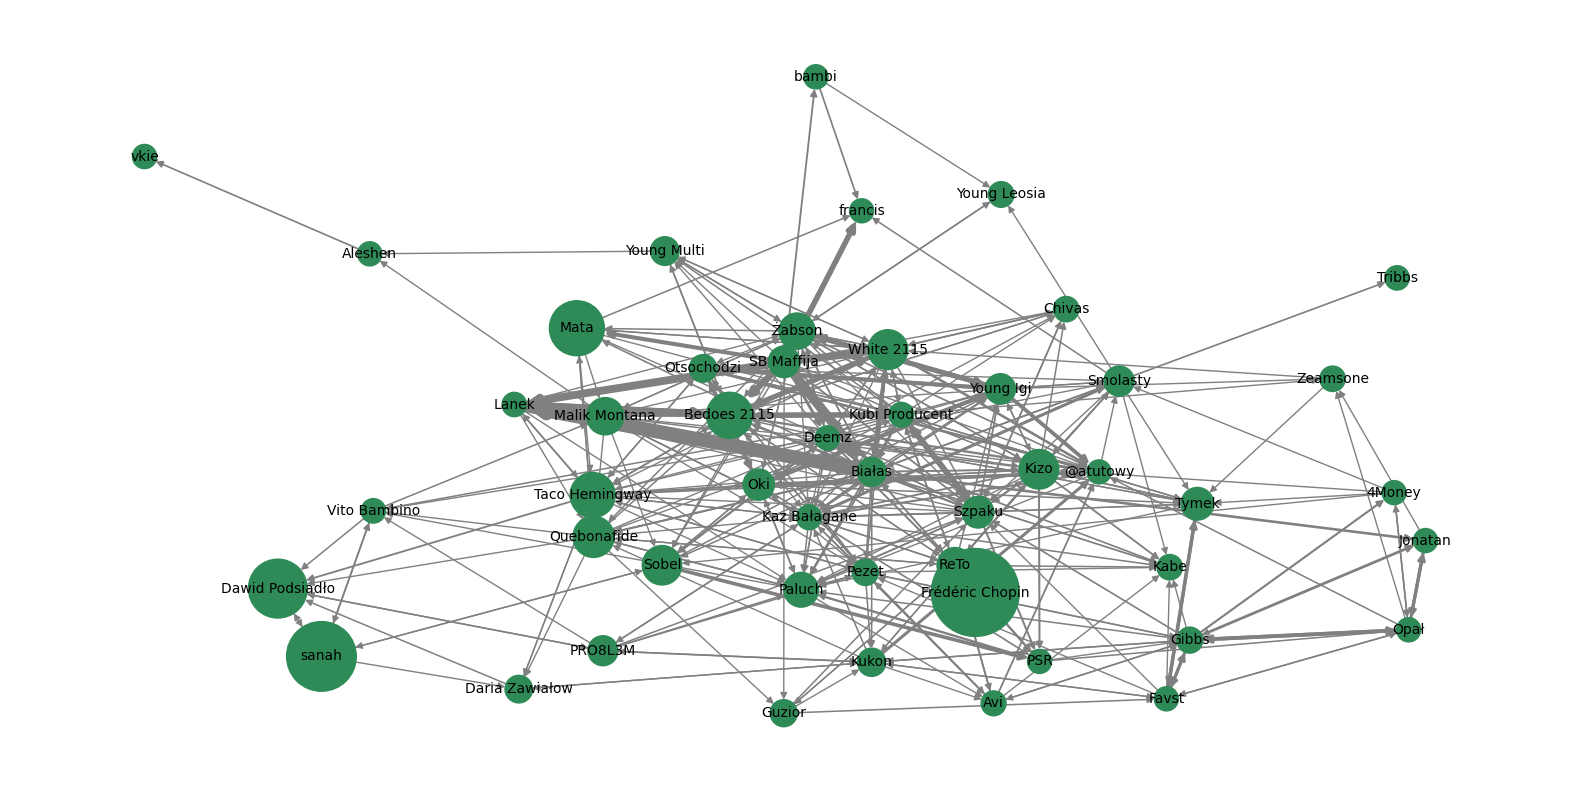

In [289]:
top_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]["popularity"], reverse=True)[
    :50
]

subgraph = G.subgraph([node[0] for node in top_nodes])

node_data = pd.DataFrame(dict(subgraph.nodes(data=True)).values())
node_size = MinMaxScaler((300, 4e3)).fit_transform(node_data[["followers"]] ** 2)

edge_data = [
    (v1, v2, data["collaboration_count"]["collaboration_count"])
    for v1, v2, data in subgraph.edges(data=True)
]
edge_data = pd.DataFrame(edge_data, columns=["v1", "v2", "collaboration_count"])
edge_size = MinMaxScaler((1, 10)).fit_transform(edge_data[["collaboration_count"]])

layout = nx.kamada_kawai_layout(subgraph)

labels = {node: data["name"] for node, data in subgraph.nodes(data=True)}

fig, ax = plt.subplots(figsize=(20, 10))
nx.draw(
    subgraph,
    pos=layout,
    node_size=node_size,
    width=edge_size,
    font_size=10,
    node_color="seagreen",
    edge_color="gray",
    with_labels=True,
    labels=labels,
)

plt.show()

Wizualizacja sieci dla 50. artystów o największym stopniu wierzchołka, w której wielkość węzła zależy od liczby obserwatorów, a grubość krawędzi od liczby wspólnych kolaboracji

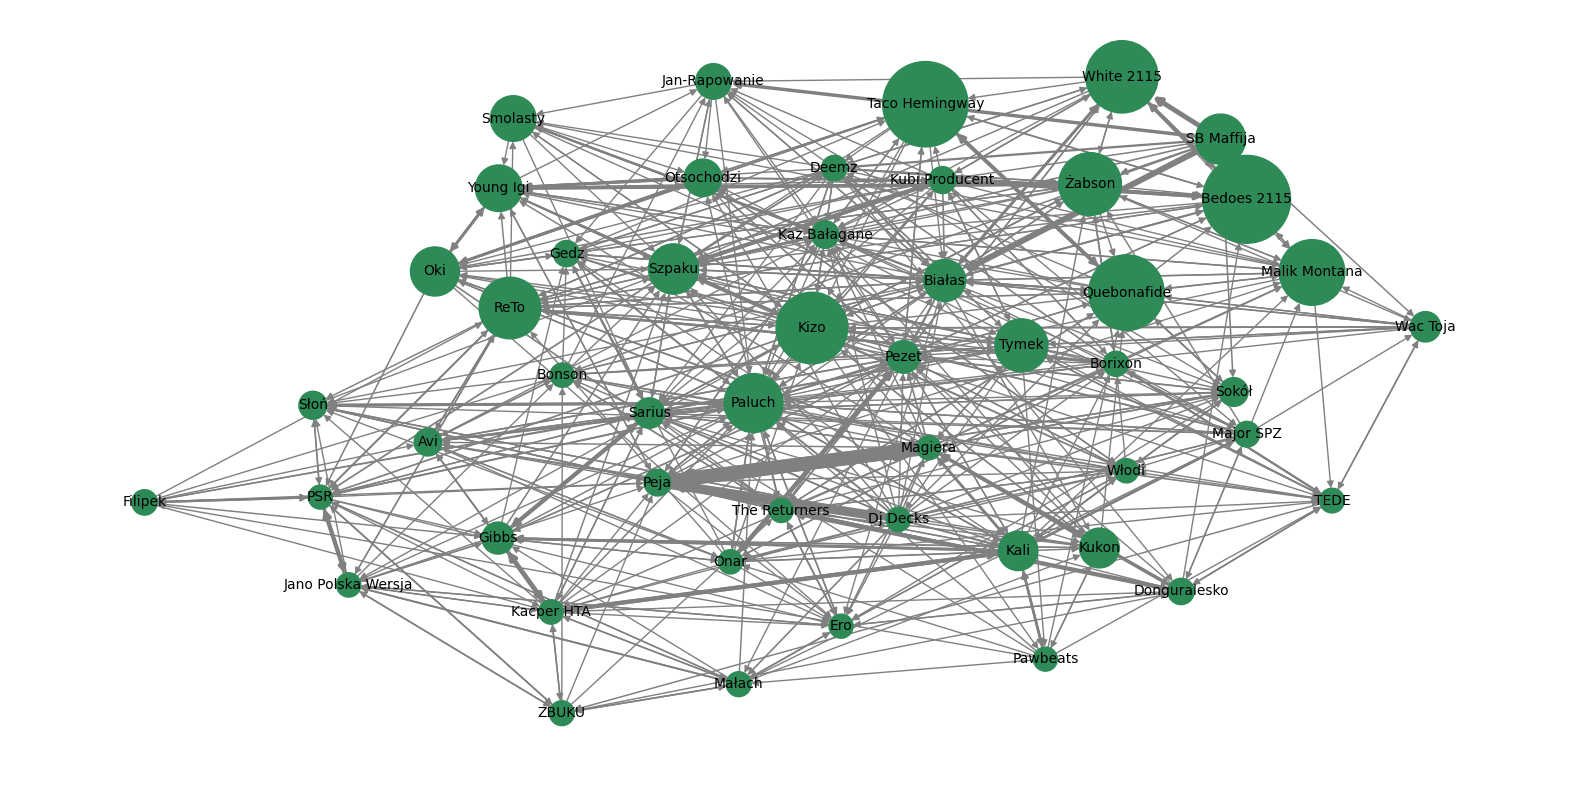

In [290]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

top_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:50]

subgraph = G.subgraph([node[0] for node in top_nodes])

node_data = pd.DataFrame(dict(subgraph.nodes(data=True)).values())
node_size = MinMaxScaler((300, 4e3)).fit_transform(node_data[["followers"]] ** 2)

edge_data = [
    (v1, v2, data["collaboration_count"]["collaboration_count"])
    for v1, v2, data in subgraph.edges(data=True)
]
edge_data = pd.DataFrame(edge_data, columns=["v1", "v2", "collaboration_count"])
edge_size = MinMaxScaler((1, 10)).fit_transform(edge_data[["collaboration_count"]])

layout = nx.kamada_kawai_layout(subgraph)

labels = {node: data["name"] for node, data in subgraph.nodes(data=True)}

fig, ax = plt.subplots(figsize=(20, 10))
nx.draw(
    subgraph,
    pos=layout,
    node_size=node_size,
    width=edge_size,
    font_size=10,
    node_color="seagreen",
    edge_color="gray",
    with_labels=True,
    labels=labels,
)

plt.show()

Wykonajmy podobną wizualizację dla artystów z największą liczbą obserwatorów, ale wykluczając polski hip hop i trap

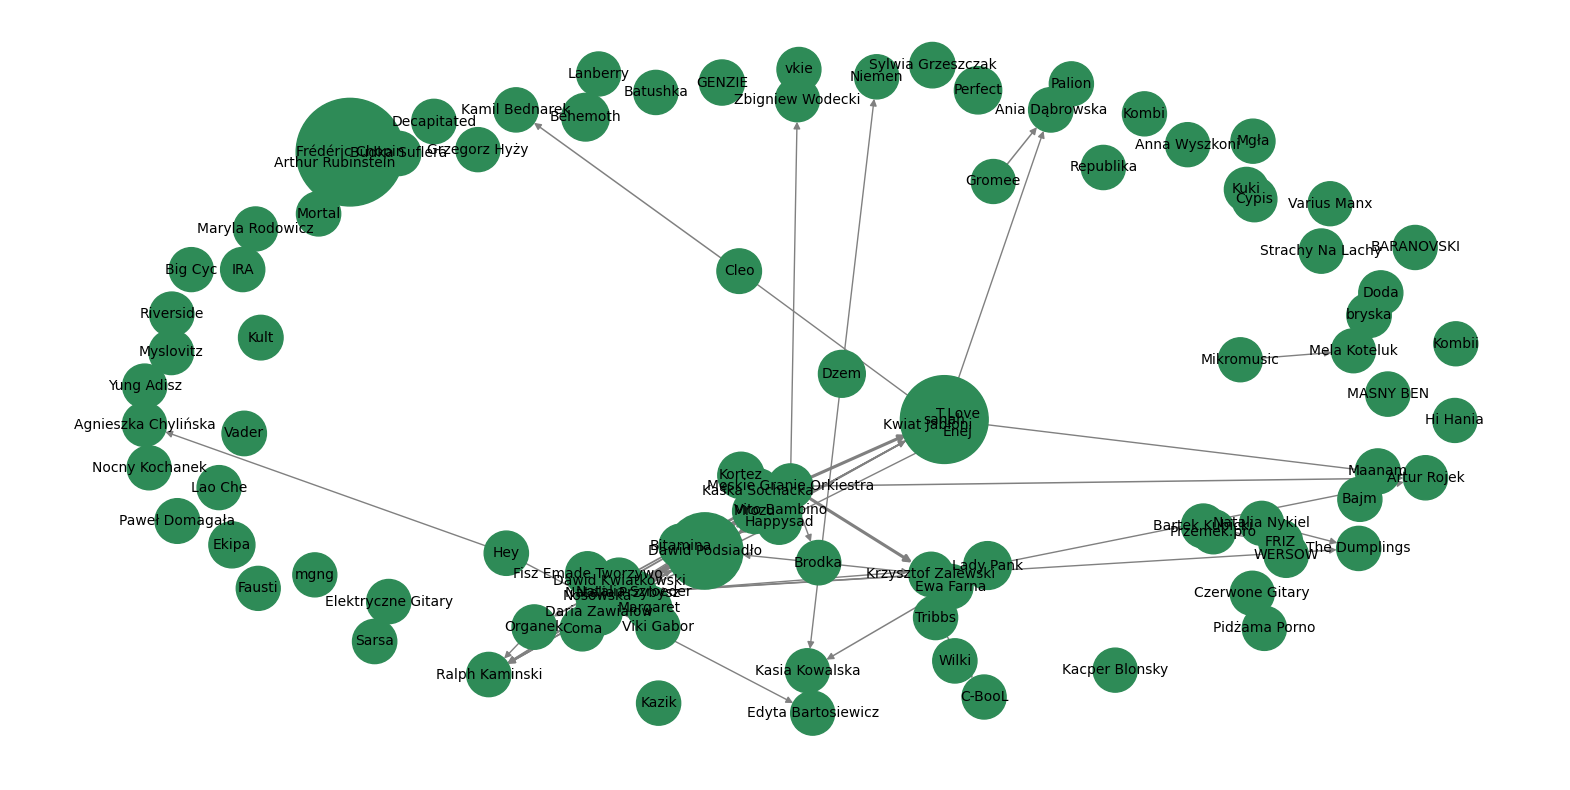

In [291]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

nodes_df_without_hiphop = nodes[~nodes["genres"].str.contains("hip hop")]

top_nodes = nodes_df_without_hiphop.sort_values(by="followers", ascending=False)[:100][
    ["id", "followers"]
].values.tolist()

top_nodes = [node for node, _ in top_nodes if node in G.nodes]


subgraph = G.subgraph(top_nodes)
node_data = pd.DataFrame(dict(subgraph.nodes(data=True)).values())
node_size = MinMaxScaler((1e3, 6e3)).fit_transform(node_data[["followers"]] ** 2)

edge_data = [
    (v1, v2, data["collaboration_count"]["collaboration_count"])
    for v1, v2, data in subgraph.edges(data=True)
]
edge_data = pd.DataFrame(edge_data, columns=["v1", "v2", "collaboration_count"])
edge_size = MinMaxScaler((1, 10)).fit_transform(edge_data[["collaboration_count"]])

layout = nx.spring_layout(subgraph)
labels = {node: data["name"] for node, data in subgraph.nodes(data=True)}

fig, ax = plt.subplots(figsize=(20, 10))
nx.draw(
    subgraph,
    pos=layout,
    node_size=node_size,
    width=edge_size,
    font_size=10,
    node_color="seagreen",
    edge_color="gray",
    with_labels=True,
    labels=labels,
)

plt.show()

In [292]:
nodes

,id,name,genres,popularity,followers
0,7y97mc3bZRFXzT2szRM4L4,Frédéric Chopin,"['classical', 'early romantic era', 'polish cl...",73,3217463
1,6iqDK7aHVlwGGgPmcdSK5L,Tribbs,"['polish pop', 'polish viral pop']",69,147928
2,1T4HxOYolAEb5PadIVKdWZ,Gibbs,['polish hip hop'],70,375421
3,7CJgLPEqiIRuneZSolpawQ,Taco Hemingway,"['polish hip hop', 'polish trap']",69,1453560
4,0LX2VNf5w4iOHW1yyIqb74,Bedoes 2115,"['polish hip hop', 'polish trap']",69,1500183
...,...,...,...,...,...
493,6YpCzWpIXRTdLlpPgDcMJZ,Łona,"['polish alternative rap', 'polish old school ...",40,11356
494,1H8lEfbUpbcXWFqbW9BMro,WŁODAR,['polish viral pop'],40,27681
495,1CzKORB9IN0EjPEyeKBIkf,Tides From Nebula,"['cosmic post-rock', 'instrumental post-rock',...",30,50548
496,6gG1FOW5CoylM7858JYboD,Piotr Rogucki,"['polish alternative', 'sung poetry']",40,74127


Jakość wizualizacji można polepszyć poprzez pominięcie węzłów bez krawędzi

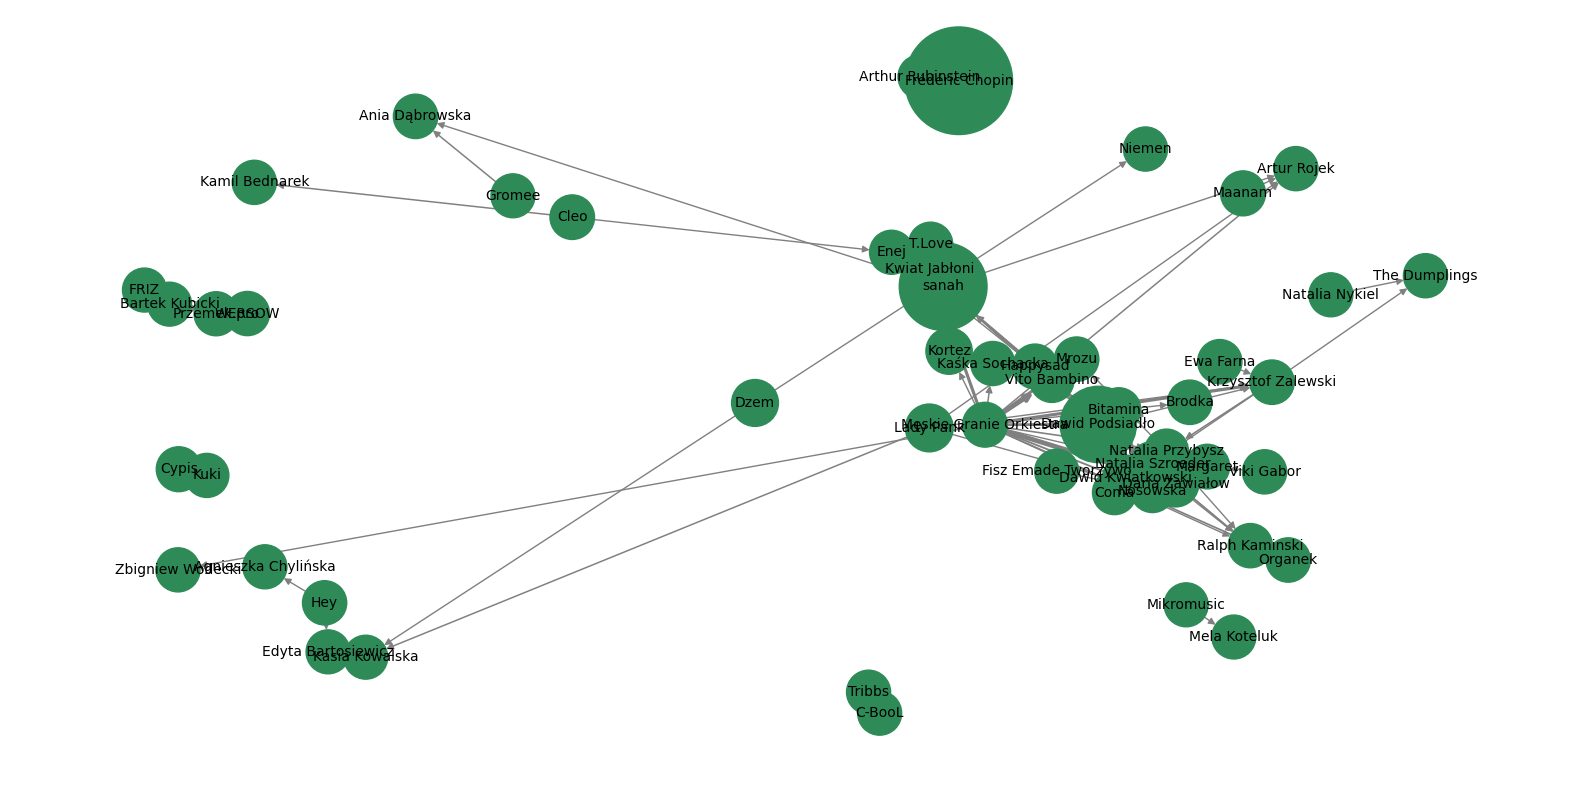

In [293]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

nodes_df_without_hiphop = nodes[~nodes["genres"].str.contains("hip hop")]
top_nodes = nodes_df_without_hiphop.sort_values(by="followers", ascending=False)[:100][
    ["id", "followers"]
].values.tolist()

top_nodes = [node for node, _ in top_nodes if node in G.nodes]

subgraph = G.subgraph(top_nodes)

subgraph = subgraph.subgraph(
    [node for node in subgraph.nodes if subgraph.degree(node) > 0]
)

node_data = pd.DataFrame(dict(subgraph.nodes(data=True)).values())
node_size = MinMaxScaler((1e3, 6e3)).fit_transform(node_data[["followers"]] ** 2)


edge_data = [
    (v1, v2, data["collaboration_count"]["collaboration_count"])
    for v1, v2, data in subgraph.edges(data=True)
]
edge_data = pd.DataFrame(edge_data, columns=["v1", "v2", "collaboration_count"])
edge_size = MinMaxScaler((1, 10)).fit_transform(edge_data[["collaboration_count"]])

layout = nx.spring_layout(subgraph)
labels = {node: data["name"] for node, data in subgraph.nodes(data=True)}

fig, ax = plt.subplots(figsize=(20, 10))
nx.draw(
    subgraph,
    pos=layout,
    node_size=node_size,
    width=edge_size,
    font_size=10,
    node_color="seagreen",
    edge_color="gray",
    with_labels=True,
    labels=labels,
)

plt.show()

Sprawdzamy czy sieć jest silnie spójna - czy każdy wierzchołek osiągalny z każdego innego wierzchołka


In [294]:
is_strongly_connected = nx.is_strongly_connected(G)

is_strongly_connected

False

Sprawdźmy ile jest silnych komponentów

In [295]:
strongly_connected_components = nx.number_strongly_connected_components(G)

strongly_connected_components

233

Sprawdźmy jacy artyści nie mają żadnych kolaboracji/gości na utworach

In [296]:
num_isolated_nodes = sum(1 for node in G.nodes() if G.degree(node) == 0)

num_isolated_nodes

99

In [297]:
isolated_nodes = [node for node in G.nodes() if G.degree(node) == 0]

nodes[nodes["id"].isin(isolated_nodes)][["name", "genres", "popularity"]].sort_values(
    by="popularity", ascending=False
).head(20)

,name,genres,popularity
68,PG$,['polish viral pop'],59
118,GENZIE,"['polish viral pop', 'polish viral rap']",55
111,Skolim,['polish viral pop'],54
123,Perfect,"['polish pop', 'polish rock']",54
146,NIKOŚ,['polish viral pop'],53
162,Mortal,"['polish viral pop', 'polish viral rap']",52
145,BLANKA,['polish viral pop'],51
176,Figo i Samogony,['polish viral pop'],51
173,Vłodarski,['polish viral pop'],51
182,vkie fan,['polish underground rap'],51


Zbadanie współczynnika klastrowania przed usunięciem tych węzłów

In [298]:
clustering_coefficient = nx.average_clustering(G)

clustering_coefficient

0.15057106184572056

Po usunięciu wierzchołków izolowanych

In [299]:
G.remove_nodes_from(isolated_nodes)

G.number_of_nodes()

399

Zbadanie gęstości sieci

In [300]:
density = nx.density(G)

density

0.01972897066787572

Liczba silnie połączych komponentów

In [301]:
strongly_connected_components = nx.number_strongly_connected_components(G)

strongly_connected_components

134

Zbadanie współczynnika klastrowania

In [302]:
clustering_coefficient = nx.average_clustering(G)

clustering_coefficient

0.18793079899541063

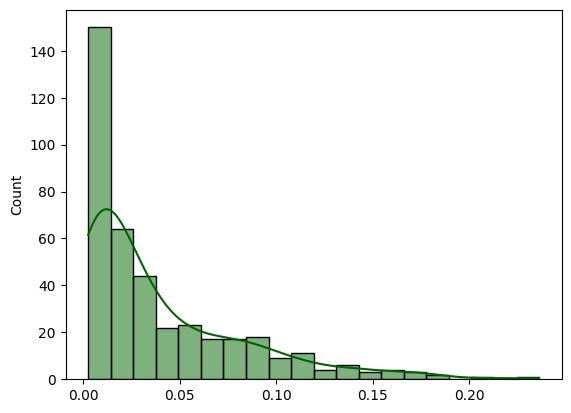

In [303]:
degree_centralities = nx.degree_centrality(G)

sns.histplot(list(degree_centralities.values()), bins=20, kde=True, color="darkgreen")
plt.show()

/tmp/ipykernel_654/847206613.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("viridis"),


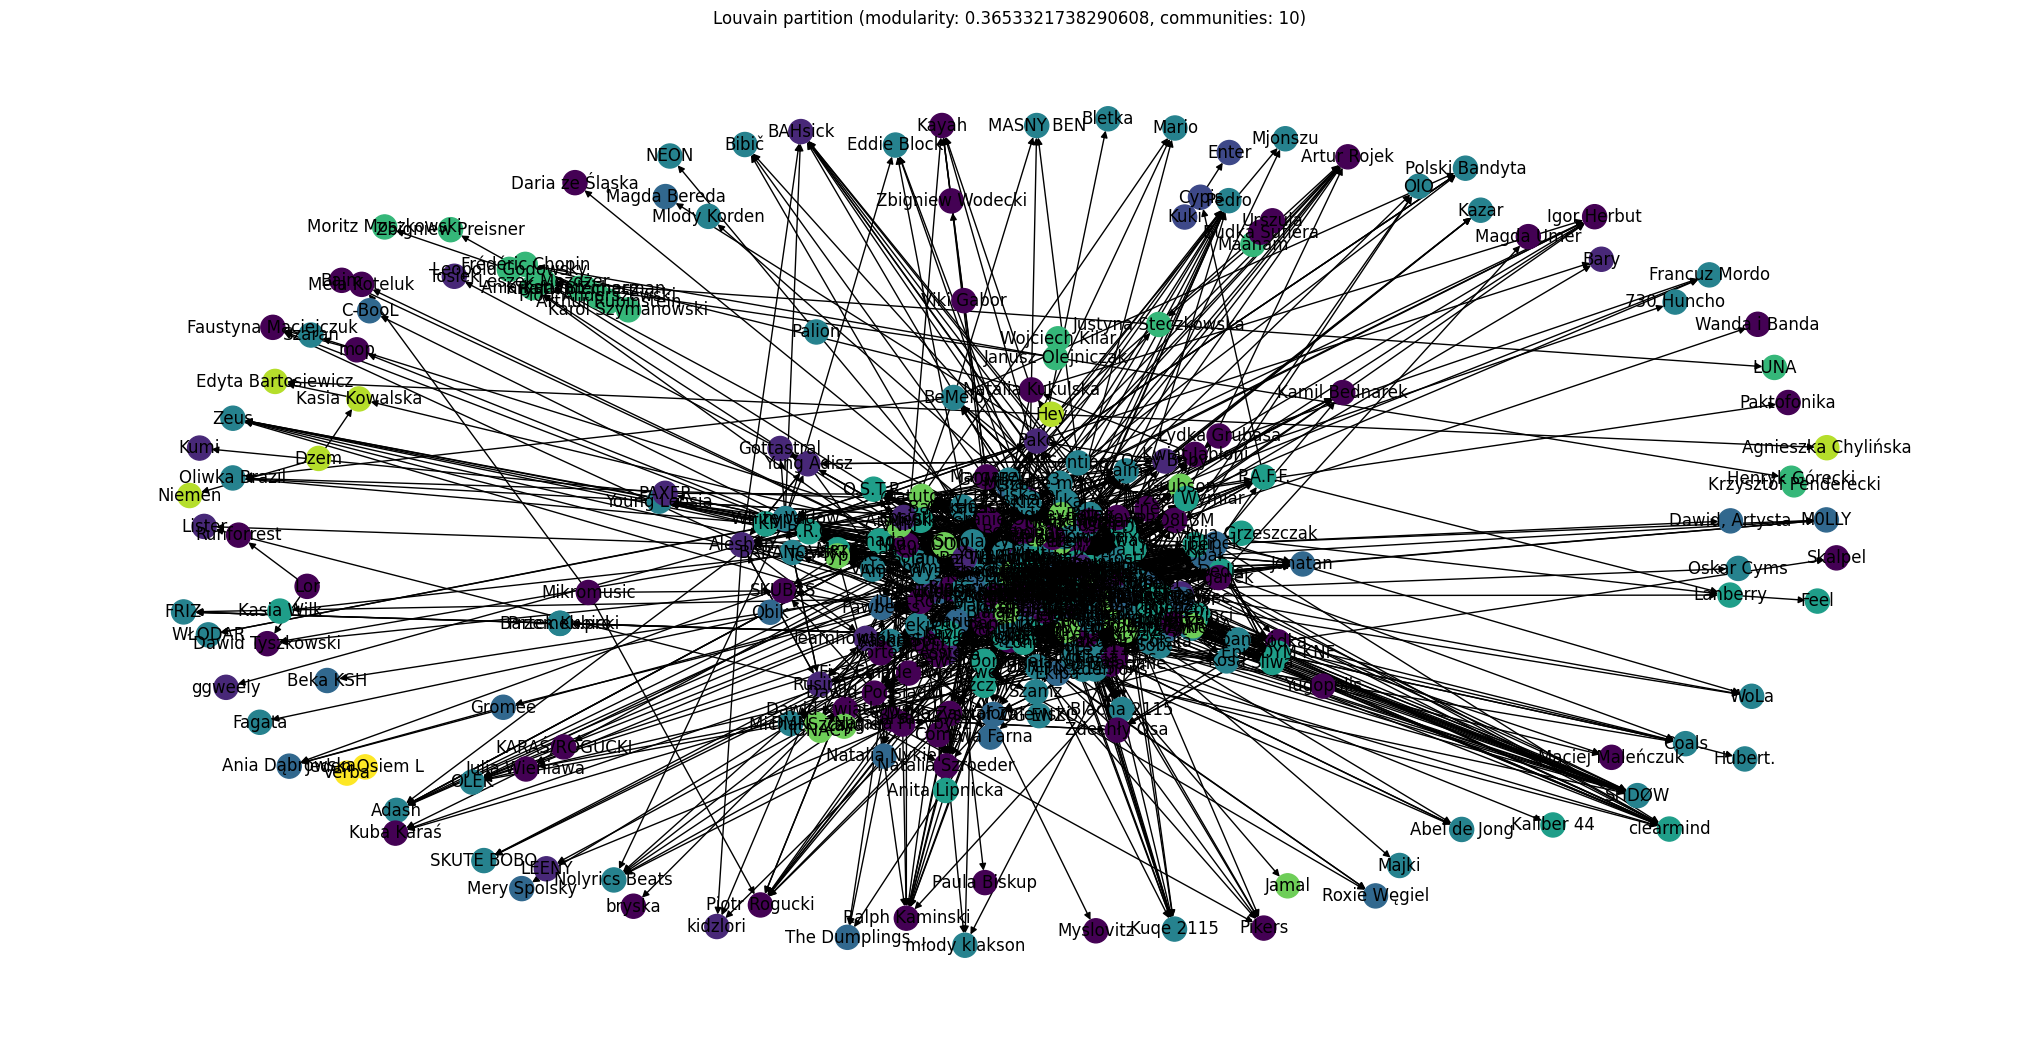

In [304]:
partition = nx.community.louvain_communities(G, seed=42)

modularity = nx.community.quality.modularity(G, partition)

color_map = []
for node in G.nodes():
    for i, community in enumerate(partition):
        if node in community:
            color_map.append(i)

plt.figure(figsize=(20, 10))

pos = nx.spring_layout(G)
labels = {node: data["name"] for node, data in G.nodes(data=True)}

nx.draw(
    G,
    pos,
    labels=labels,
    node_color=color_map,
    cmap=plt.cm.get_cmap("viridis"),
    node_size=300,
    with_labels=True,
)

plt.title(
    f"Louvain partition (modularity: {modularity}, communities: {len(partition)})"
)
plt.show()

In [305]:
for i, community in enumerate(partition):
    print(f"Community {i} ({len(community)} members):")
    c_nodes = [G.nodes[node]["name"] for node in community]
    print(", ".join(islice(c_nodes, 20)))

Community 0 (82 members):
bryska, Margaret, Mela Koteluk, T.Love, HAŁASTRA, VAE VISTIC, Cleo, Quebonafide, Runforrest, Belmondo, Mikromusic, Fisz Emade Tworzywo, Męskie Granie Orkiestra, Mrozu, Kaz Bałagane, Artur Rojek, Sarsa, Pikers, Zbigniew Wodecki, Daria Zawiałow
Community 1 (27 members):
Pako, Asster, White Widow, Cheatz, Bary, Bryan, vkie, Lister, be vis, Kumi, Tosiek, E V, Gottastral, Ozzy Baby, BarTie, ggweely, PAXER, Kosior, Aleshen, LEENY
Community 2 (3 members):
Kuki, Cypis, Enter
Community 3 (41 members):
OsaKa, Szymi Szyms, Miszel, Gromee, Salvador, Roxie Węgiel, QueQuality, Jonatan, Opał, Qbik, Louis Villain, Ekipa, Big Scythe, Beka KSH, Avi, Favst, Alan, Tribbs, C-BooL, The Dumplings
Community 4 (121 members):
730 Huncho, Tymek, Urbanski, 27.Fuckdemons, Adi Nowak, Pedro, Kazar, charlie moncler, francis, Bartek Kubicki, Sentino, Oskar Cyms, Trill Pem, BeMelo, SB Maffija, Deemz, Video, Oska030, Smolasty, Baba Hassan
Community 5 (71 members):
Rufuz, Kacper HTA, Feel, KęKę,

Wyświetlanie 10 najpopularniejszych gatunków muzycznych wraz z liczbą próbek z uproszczeniem polegającym na uwzględnieniu tylko 1. gatunku wymienionego w genres

In [306]:
nodes_df_exploded = nodes.explode("genres")
nodes_df_exploded["genres"] = nodes_df_exploded["genres"].apply(lambda x: eval(x)[0])

genre_counts = nodes_df_exploded["genres"].value_counts().reset_index()
genre_counts.columns = ["genre", "node_count"]

genre_counts.head(10)

,genre,node_count
0,polish hip hop,181
1,polish pop,66
2,polish viral pop,45
3,polish alternative,33
4,polish alternative rap,28
5,polish drill,17
6,polish underground rap,16
7,classic polish pop,12
8,polish alternative rock,10
9,polish trap,9


Wyświetlanie 10 najpopularniejszych gatunków muzycznych wraz z liczbą próbek (bez uproszczenia)

In [316]:
new_df = nodes.copy()
new_df["genres"] = new_df["genres"].apply(lambda x: ",".join(eval(x)))
genres_df = new_df["genres"].str.get_dummies(sep=",")

new_df = pd.concat([new_df, genres_df], axis=1)

new_df = new_df.drop("genres", axis=1)
new_df.head(3)

,id,name,popularity,followers,ambient,atmospheric black metal,avant-garde,black metal,brutal death metal,chamber folk,classic polish pop,classical,classical performance,classical piano,compositional ambient,contemporary classical,cosmic post-rock,crank wave,czech pop,dark post-punk,death metal,deathgrind,deathrash,disco polo,drift,drift phonk,drone,early modern classical,early romantic era,ecm-style jazz,french post-punk,german romanticism,groove metal,impressionism,instrumental post-rock,instrumental stoner rock,jazz trio,jazztronica,klubowe,late romantic era,medieval folk,melodic death metal,metal,minimalism,modern jazz trio,norwegian jazz,nu age,nu jazz,pagan black metal,poezja spiewana,polish alternative,polish alternative rap,polish alternative rock,polish ambient,polish black metal,polish blues,polish choir,polish classical,polish classical piano,polish contemporary classical,polish death metal,polish drill,polish electronica,polish experimental electronic,polish folk,polish folk metal,polish hip hop,polish indie,polish indie rock,polish jazz,polish metal,polish modern jazz,polish old school hip hop,polish pop,polish post-punk,polish post-rock,polish prog,polish psychedelia,polish punk,polish reggae,polish rock,polish synthpop,polish techno,polish thrash metal,polish trap,polish underground rap,polish viral pop,polish viral rap,post-rock,post-romantic era,prog metal,progressive metal,psychedelic doom,psychedelic space rock,rap motywacja,rap uliczny,raw techno,rune folk,rusyn folk,slavic folk metal,slavic metal,smutny rap,sound art,space rock,speed metal,stoner metal,stoner rock,sung poetry,talent show,technical death metal,technical groove metal,thrash metal,trip hop,voidgaze
0,7y97mc3bZRFXzT2szRM4L4,Frédéric Chopin,73,3217463,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6iqDK7aHVlwGGgPmcdSK5L,Tribbs,69,147928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1T4HxOYolAEb5PadIVKdWZ,Gibbs,70,375421,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [317]:
genre_counts = (
    new_df.drop(["id", "name", "popularity", "followers"], axis=1)
    .sum()
    .sort_values(ascending=False)
)

genre_counts.head(10)

polish hip hop            209
polish pop                 88
polish trap                56
polish viral pop           56
polish alternative         36
polish underground rap     30
polish alternative rap     30
rap uliczny                23
polish rock                22
polish drill               17
dtype: int64

Utworzenie grafu nieskierowanego (krawędzie tylko wtedy, gdy w oryginalnym grafie istnieje krawędź między dwoma wierzchołkami w dwie strony) i zbadanie klik

In [318]:
undirected_G = nx.Graph()

for u, v in G.edges():
    if G.has_edge(u, v) and G.has_edge(v, u):
        undirected_G.add_edge(u, v)

cliques = list(nx.find_cliques(undirected_G))

cliques = [[G.nodes[node]["name"] for node in clique] for clique in cliques]
cliques = [clique for clique in cliques if len(clique) > 2]

print(len(cliques))
print("Znalezione kliki:")
for clique in cliques:
    print(clique)

188
Znalezione kliki:
['Tymek', 'Magiera', 'Holak']
['Tymek', 'Magiera', 'Sarius']
['Tymek', 'Holak', 'Frosti']
['Tymek', 'Kubi Producent', 'Szpaku']
['Tymek', 'Deemz', 'Szpaku']
['Tymek', 'Bonson', 'Czarny HIFI']
['Tymek', 'TEDE', 'Wac Toja']
['Tymek', 'Czarny HIFI', 'Sarius']
['Tymek', 'Kizo', 'Frosti']
['Tymek', 'Kizo', 'Szpaku', 'Sarius']
['Tymek', 'Kizo', 'Wac Toja']
['Adi Nowak', 'Donguralesko', 'Matheo']
['Oliver Olson', 'Kacper HTA', 'Gibbs', 'Fonos']
['Oliver Olson', 'Kacper HTA', '4Money']
['Oliver Olson', 'Intruz', 'Dedis']
['Oliver Olson', 'Floral Bugs', 'Dedis']
['Oliver Olson', 'Floral Bugs', '4Money']
['Matheo', 'Popek', 'Sobota']
['Matheo', 'Popek', 'Borixon']
['Matheo', 'Major SPZ', 'Donguralesko']
['Matheo', 'TEDE', 'Wac Toja']
['Matheo', 'TEDE', 'Borixon']
['Matheo', 'TEDE', 'Donguralesko']
['Matheo', 'Shellerini', 'Donguralesko']
['Ero', 'Małach', 'Jano Polska Wersja', 'Hinol Polska Wersja']
['Ero', 'Włodi', 'The Returners']
['Ero', 'Donguralesko', 'The Returners']


# Wnioski

- Blisko 100 artystów nie występowało gościnnie/ nie zapraszało innych gości z top 500
- Najwięcej kolaboracji można obserwować dla gatunków typu hip hop
- Dominującymi gatunkami jest hip hop, pop, alternatywa/alternatywny rock